<a href="https://colab.research.google.com/github/arnavjune2/computer-vision/blob/main/image_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
ROOT = "/content/drive/MyDrive/iNeuron DL"
os.chdir(ROOT)

In [4]:
os.listdir()

['test.h5',
 'logs',
 'model_ckpt.h5',
 'Tensorflow.ipynb',
 'batchNormalization.ipynb',
 'TransferLearning.ipynb',
 'images.jpg',
 'car_grayscale.jpg',
 'image_understanding.ipynb']

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [6]:
car1 = mpimg.imread("images.jpg")

In [7]:
car1.shape

(138, 365, 3)

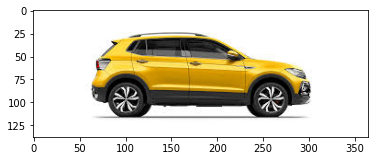

In [8]:
plt.imshow(car1)

In [9]:
#using cv2
car1_cv2 = cv2.imread("images.jpg")

In [10]:
cv2.imshow("image", car1_cv2) #error will occur in the 

DisabledFunctionError: ignored

In [11]:
from google.colab.patches import cv2_imshow

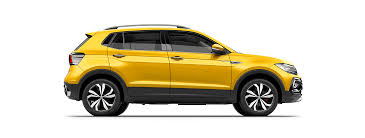

In [12]:
cv2_imshow( car1_cv2)

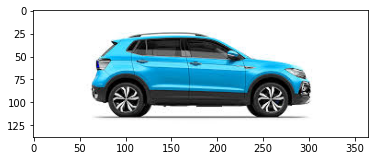

In [13]:
plt.imshow(car1_cv2) #cv2 reads data as BGR and matplot lib reads the data as RBG

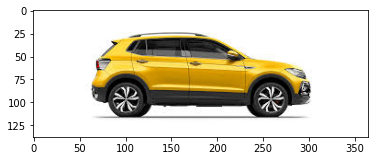

In [14]:
car1_cv2_BGR_RBG = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RBG)

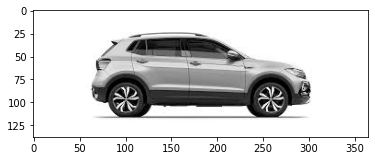

In [63]:
car1_cv2_gray = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_gray, cmap = "gray")

In [16]:
car1_cv2_gray.shape

(138, 365)

In [17]:
cv2.imwrite("car_grayscale.jpg", car1_cv2_gray) #saving thegray scale image

True

#understanding the compostion of the colored image

In [18]:
def visualize_RGB_channels(imgArray=None, fig_size=(10,7) ):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  #zero mat
  Z = np.zeros(B.shape, dtype=B.dtype)

  #init subplots
  fig, ax = plt.subplots(2,2, figsize= fig_size)

  #setting the axis off
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("original image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("red image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("green image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("blue image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

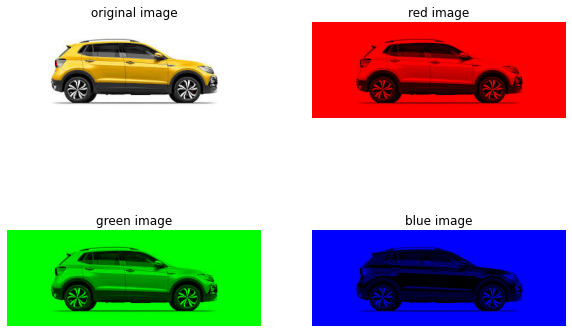

In [19]:
visualize_RGB_channels(imgArray=car1_cv2)

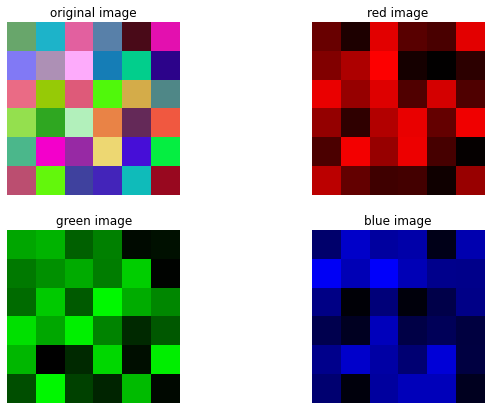

In [20]:
#using a random colored imnage
random_image = np.random.randint(0, 255, (6,6,3))
random_image.shape
visualize_RGB_channels(random_image)

## understanding the filters

In [42]:
# sobel filter
# Sobel filter is used in image processing and computer vision, particularly within edge
# detection algorithms where it creates an image emphasising edges
sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


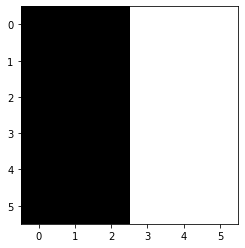

In [43]:
# example array

example1 = [[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],]

example1 = np.array(example1)

example2 = [[255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],]

example2 = np.array(example2)

plt.imshow(example1, cmap="gray")

In [44]:
def find_edges(imgFilter=None, picture=None):
  # extract row and col of input pic
  p_row, p_col = picture.shape # 

  k = imgFilter.shape[0] # k = 3

  temp = list() # to store final result

  stride = 1
  # resultant rows and col
  final_cols = (p_col - k)//stride  + 1
  final_rows = (p_row - k)//stride  + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontally right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      temp.append(sum(sum(imgFilter * target_area_of_pic)))

  return np.array(temp).reshape(final_rows, final_cols)

In [45]:
result= find_edges(sobel, example1 )
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

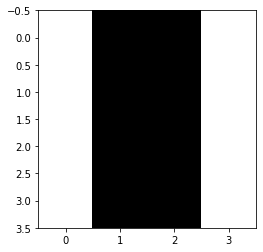

In [55]:
plt.imshow(result, cmap="gray")
#one edge found at the centre

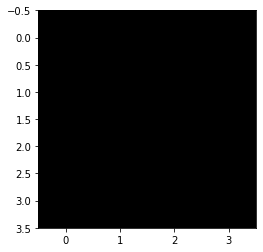

In [53]:
#finding a horizontal edge
result_T= find_edges(sobel.T, example1 )
plt.imshow(result_T, cmap="gray")
#the result will be blank as no horizontall edge was present

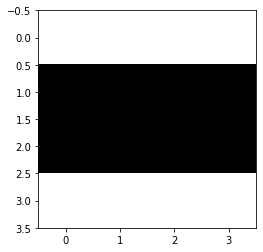

In [57]:
#finding a horizontal edge in the transpose of the example(i.e there is one 
# horizontal edge in example.T)
result_T= find_edges(sobel.T, example1.T )
plt.imshow(result_T, cmap="gray")

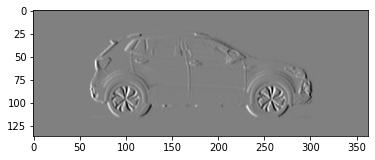

In [66]:
#verticle sobel filter
result_car  =find_edges(sobel, car1_cv2_gray)
plt.imshow(result_car, cmap="gray")

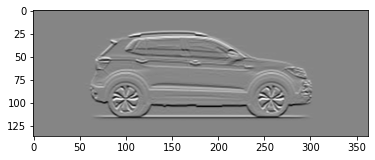

In [68]:
#horizontal sobel filter
result_car  =find_edges(sobel.T, car1_cv2_gray)
plt.imshow(result_car, cmap="gray")